
=== Test Metrics (80/20 split) ===
            Model  Accuracy  Precision (macro)  Recall (macro)  Precision (weighted)  Recall (weighted)
        SVM (rbf)    0.9825             0.9812          0.9812                0.9825             0.9825
LogReg (baseline)    0.9825             0.9812          0.9812                0.9825             0.9825
     SVM (linear)    0.9737             0.9697          0.9742                0.9740             0.9737
SVM (poly, deg=3)    0.9737             0.9697          0.9742                0.9740             0.9737
    SVM (sigmoid)    0.9298             0.9218          0.9296                0.9311             0.9298


<Figure size 1000x600 with 0 Axes>

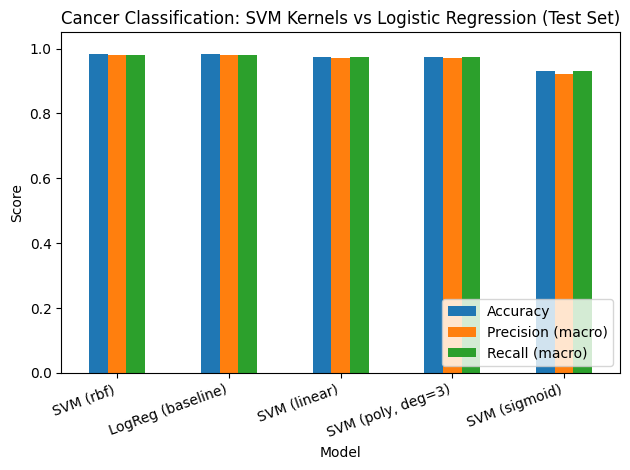


Confusion matrix for SVM (linear):
[[41  1]
 [ 2 70]]

Confusion matrix for SVM (poly, deg=3):
[[41  1]
 [ 2 70]]

Confusion matrix for SVM (rbf):
[[41  1]
 [ 1 71]]

Confusion matrix for SVM (sigmoid):
[[39  3]
 [ 5 67]]

Confusion matrix for LogReg (baseline):
[[41  1]
 [ 1 71]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    classification_report, confusion_matrix
)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


models = {
    "SVM (linear)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="linear", probability=False, random_state=42))
    ]),
    "SVM (poly, deg=3)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="poly", degree=3, coef0=1.0, random_state=42))
    ]),
    "SVM (rbf)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", gamma="scale", random_state=42))
    ]),
    "SVM (sigmoid)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="sigmoid", coef0=0.0, random_state=42))
    ]),
    "LogReg (baseline)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            max_iter=500, solver="lbfgs", random_state=42
        ))
    ])
}


results = []

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec_macro = precision_score(y_test, y_pred, average="macro", zero_division=0)
    rec_macro = recall_score(y_test, y_pred, average="macro", zero_division=0)
    prec_weighted = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    rec_weighted = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        "model": name,
        "accuracy": acc,
        "precision_macro": prec_macro,
        "recall_macro": rec_macro,
        "precision_weighted": prec_weighted,
        "recall_weighted": rec_weighted,
        "confusion_matrix": cm
    })


import pandas as pd
df = pd.DataFrame([{
    "Model": r["model"],
    "Accuracy": r["accuracy"],
    "Precision (macro)": r["precision_macro"],
    "Recall (macro)": r["recall_macro"],
    "Precision (weighted)": r["precision_weighted"],
    "Recall (weighted)": r["recall_weighted"]
} for r in results]).sort_values(by="Accuracy", ascending=False)

pd.set_option("display.precision", 4)
print("\n=== Test Metrics (80/20 split) ===")
print(df.to_string(index=False))


metrics_to_plot = ["Accuracy", "Precision (macro)", "Recall (macro)"]
plot_df = df.set_index("Model")[metrics_to_plot]

plt.figure(figsize=(10, 6))
plot_df.plot(kind="bar")
plt.title("Cancer Classification: SVM Kernels vs Logistic Regression (Test Set)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=20, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


for r in results:
    print(f"\nConfusion matrix for {r['model']}:")
    print(r["confusion_matrix"])

# problem 2

In [4]:
#just checking the data

import pandas as pd

df = pd.read_csv("Housing.csv")
print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

print("\nSample rows:")
print(df.head(10))

print("\nUnique values in each column:")
for col in df.columns:
    if df[col].dtype == "object":
        print(f"{col}: {df[col].unique()[:10]}")


Shape: (545, 13)

Column names:
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Sample rows:
      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes    


=== Test Metrics (80/20 split) ===
            Model      R²        MAE       RMSE
       SVR-linear -0.1011 1.7634e+06 2.3592e+06
         SVR-poly -0.1016 1.7639e+06 2.3596e+06
          SVR-rbf -0.1016 1.7639e+06 2.3596e+06
      SVR-sigmoid -0.1015 1.7639e+06 2.3596e+06
Ridge (L2 Linear)  0.6436 9.7915e+05 1.3422e+06


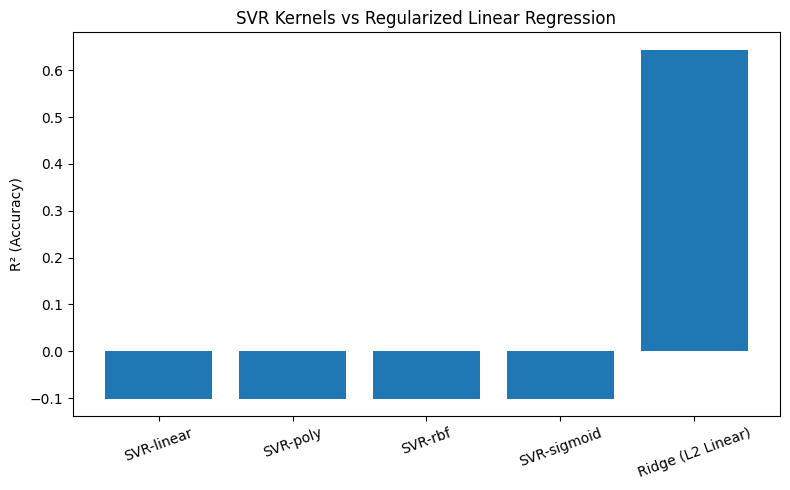

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv("Housing.csv")
cols = ["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom",
        "basement", "hotwaterheating", "airconditioning", "parking", "prefarea", "price"]
data = data[cols]
for c in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
    data[c] = data[c].map({"yes": 1, "no": 0})
X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "SVR-linear": SVR(kernel="linear"),
    "SVR-poly": SVR(kernel="poly", degree=3),
    "SVR-rbf": SVR(kernel="rbf"),
    "SVR-sigmoid": SVR(kernel="sigmoid"),
    "Ridge (L2 Linear)": Ridge(alpha=1.0)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, mae, rmse))

df = pd.DataFrame(results, columns=["Model", "R²", "MAE", "RMSE"])
print("\n=== Test Metrics (80/20 split) ===")
print(df.to_string(index=False))

plt.figure(figsize=(8,5))
plt.bar(df["Model"], df["R²"])
plt.ylabel("R² (Accuracy)")
plt.title("SVR Kernels vs Regularized Linear Regression")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
